In [133]:
import torch
import torchvision
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
from torchvision import transforms
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable
import torch.nn.functional as F

import os
import numpy as np
import matplotlib.pyplot as plt


from google.colab import drive
drive.mount('/content/drive')

model = torch.hub.load('pytorch/vision:v0.10.0', 'vgg11', pretrained=True)

preprocess = { 
    'train': transforms.Compose([
        transforms.RandomResizedCrop(size=256, scale=(0.8, 1.0)),
        transforms.RandomRotation(degrees=15),
        transforms.RandomHorizontalFlip(),
        transforms.CenterCrop(size=224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225])
    ]),
    'valid': transforms.Compose([
        transforms.Resize(size=256),
        transforms.CenterCrop(size=224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225])
    ]),
    'test': transforms.Compose([
        transforms.Resize(size=256),
        transforms.CenterCrop(size=224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225])
    ])
}

model.eval()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.10.0


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (11): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (12): ReLU(inplace=True)
    (13): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (14): ReLU(inplace=True)
    (15): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
 

In [134]:
path = '/content/drive/My Drive/assgn4/assgn4'
test_path = '/content/drive/My Drive/assgn4/assgn4/test/'
train_path = '/content/drive/My Drive/assgn4/assgn4/train/'
valid_path = '/content/drive/My Drive/assgn4/assgn4/valid/'

!rm -rf test_path/.DS_Store
!rm -rf train_path/.DS_Store
!rm -rf valid_path/.DS_Store

train_dataset = datasets.ImageFolder(root = train_path, transform = preprocess['train'])
test_dataset = datasets.ImageFolder(root = test_path, transform = preprocess['test'])
valid_dataset = datasets.ImageFolder(root = valid_path, transform = preprocess['valid'])

In [135]:
batch_size = 50
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size, shuffle = True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size, shuffle = True)
valid_loader = torch.utils.data.DataLoader(valid_dataset, batch_size, shuffle = True)

idx_to_class = {v: k for k, v in train_dataset.class_to_idx.items()}
print(idx_to_class)

classes = os.listdir(test_path)
classes.sort()
print('class names:', classes)
print('number of classes', len(classes))

train_data_size = len(train_dataset)
valid_data_size = len(valid_dataset)
test_data_size = len(test_dataset)

{0: 'air hockey', 1: 'axe throwing', 2: 'basketball', 3: 'bmx', 4: 'bull riding', 5: 'chuckwagon racing', 6: 'disc golf', 7: 'figure skating pairs', 8: 'formula 1 racing', 9: 'golf', 10: 'high jump', 11: 'horseshoe pitching', 12: 'ice yachting', 13: 'judo', 14: 'motorcycle racing', 15: 'parallel bar', 16: 'polo', 17: 'roller derby', 18: 'sailboat racing', 19: 'ski jumping', 20: 'snowmobile racing', 21: 'surfing', 22: 'track bicycle', 23: 'uneven bars', 24: 'weightlifting'}
class names: ['.DS_Store', 'air hockey', 'axe throwing', 'basketball', 'bmx', 'bull riding', 'chuckwagon racing', 'disc golf', 'figure skating pairs', 'formula 1 racing', 'golf', 'high jump', 'horseshoe pitching', 'ice yachting', 'judo', 'motorcycle racing', 'parallel bar', 'polo', 'roller derby', 'sailboat racing', 'ski jumping', 'snowmobile racing', 'surfing', 'track bicycle', 'uneven bars', 'weightlifting']
number of classes 26


In [136]:
for param in model.parameters():
    param.requires_grad = False

device = "cuda"

n_inputs = model.classifier[0].in_features

model.classifier = nn.Sequential(nn.Linear(n_inputs, 256), nn.ReLU(), nn.Dropout(0.4), nn.Linear(256, 25), nn.LogSoftmax(dim=1))
model = model.to('cuda:0')
model.eval()

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (11): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (12): ReLU(inplace=True)
    (13): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (14): ReLU(inplace=True)
    (15): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
 

In [137]:
loss_func = nn.NLLLoss()
optimizer = optimizer = torch.optim.Adam(model.parameters(), lr=1e-4, weight_decay=1e-5)

In [138]:
import time
time.sleep(3)

epochs = 4

def train_and_validate(model, loss_criterion, optimizer):
    
    start = time.time()
    history = []
    best_loss = 100000.0
    best_epoch = None

    for epoch in range(epochs):
        epoch_start = time.time()
        print("Epoch: {}/{}".format(epoch+1, epochs))
        
        # Set to training mode
        model.train()
        
        # Loss and Accuracy within the epoch
        train_loss = 0.0
        train_acc = 0.0
        
        valid_loss = 0.0
        valid_acc = 0.0
        
        for i, (inputs, labels) in enumerate(train_loader):

            inputs = inputs.to(device)
            labels = labels.to(device)
            
            # Clean existing gradients
            optimizer.zero_grad()
            
            # Forward pass - compute outputs on input data using the model
            outputs = model(inputs)
            
            # Compute loss
            loss = loss_criterion(outputs, labels)
            
            # Backpropagate the gradients
            loss.backward()
            
            # Update the parameters
            optimizer.step()
            
            # Compute the total loss for the batch and add it to train_loss
            train_loss += loss.item() * inputs.size(0)
            
            # Compute the accuracy
            ret, predictions = torch.max(outputs.data, 1)
            correct_counts = predictions.eq(labels.data.view_as(predictions))
            
            # Convert correct_counts to float and then compute the mean
            acc = torch.mean(correct_counts.type(torch.FloatTensor))
            
            # Compute total accuracy in the whole batch and add to train_acc
            train_acc += acc.item() * inputs.size(0)
            
            #print("Batch number: {:03d}, Training: Loss: {:.4f}, Accuracy: {:.4f}".format(i, loss.item(), acc.item()))

        
        # Validation - No gradient tracking needed
        with torch.no_grad():

            # Set to evaluation mode
            model.eval()

            # Validation loop
            for j, (inputs, labels) in enumerate(valid_loader):
                inputs = inputs.to(device)
                labels = labels.to(device)

                # Forward pass - compute outputs on input data using the model
                outputs = model(inputs)

                # Compute loss
                loss = loss_criterion(outputs, labels)

                # Compute the total loss for the batch and add it to valid_loss
                valid_loss += loss.item() * inputs.size(0)

                # Calculate validation accuracy
                ret, predictions = torch.max(outputs.data, 1)
                correct_counts = predictions.eq(labels.data.view_as(predictions))

                # Convert correct_counts to float and then compute the mean
                acc = torch.mean(correct_counts.type(torch.FloatTensor))

                # Compute total accuracy in the whole batch and add to valid_acc
                valid_acc += acc.item() * inputs.size(0)

                #print("Validation Batch number: {:03d}, Validation: Loss: {:.4f}, Accuracy: {:.4f}".format(j, loss.item(), acc.item()))
        if valid_loss < best_loss:
            best_loss = valid_loss
            best_epoch = epoch

        # Find average training loss and training accuracy
        avg_train_loss = train_loss/train_data_size 
        avg_train_acc = train_acc/train_data_size

        # Find average training loss and training accuracy
        avg_valid_loss = valid_loss/valid_data_size 
        avg_valid_acc = valid_acc/valid_data_size

        history.append([avg_train_loss, avg_valid_loss, avg_train_acc, avg_valid_acc])
                
        epoch_end = time.time()
    
        print("Epoch : {:03d}, Training: Loss - {:.4f}, Accuracy - {:.4f}%, \n\t\tValidation : Loss - {:.4f}, Accuracy - {:.4f}%, Time: {:.4f}s".format(epoch, avg_train_loss, avg_train_acc*100, avg_valid_loss, avg_valid_acc*100, epoch_end-epoch_start))
        
        # Save if the model has best accuracy till now
        torch.save(model, path +'_model_'+str(epoch)+'.pt')
            
    return model, history, best_epoch
    

In [139]:
trained_model, history, best_epoch = train_and_validate(model, loss_func, optimizer)

torch.save(history, path +'_history.pt')

Epoch: 1/4
Epoch : 000, Training: Loss - 1.6767, Accuracy - 56.2021%, 
		Validation : Loss - 0.3750, Accuracy - 95.2000%, Time: 34.1093s
Epoch: 2/4
Epoch : 001, Training: Loss - 0.5697, Accuracy - 85.4385%, 
		Validation : Loss - 0.1993, Accuracy - 94.4000%, Time: 34.6173s
Epoch: 3/4
Epoch : 002, Training: Loss - 0.3506, Accuracy - 91.2007%, 
		Validation : Loss - 0.1576, Accuracy - 97.6000%, Time: 34.6370s
Epoch: 4/4
Epoch : 003, Training: Loss - 0.2549, Accuracy - 93.6702%, 
		Validation : Loss - 0.0960, Accuracy - 97.6000%, Time: 33.7929s


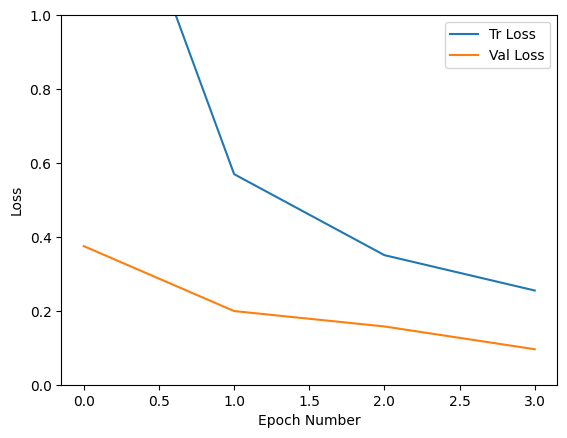

In [140]:
path = '/content/drive/My Drive/assgn4/assgn4'
history = np.array(history)
plt.plot(history[:,0:2])
plt.legend(['Tr Loss', 'Val Loss'])
plt.xlabel('Epoch Number')
plt.ylabel('Loss')
plt.ylim(0,1)
plt.savefig(path + '_loss_curve.png')
plt.show()

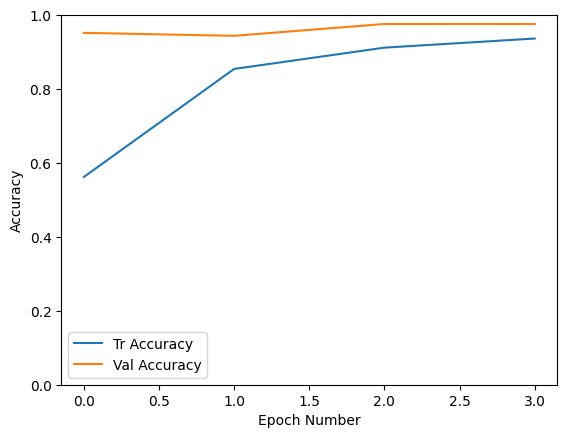

In [141]:
plt.plot(history[:,2:4])
plt.legend(['Tr Accuracy', 'Val Accuracy'])
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.ylim(0,1)
plt.savefig(path + '_accuracy_curve.png')
plt.show()

In [142]:
def computeTestSetAccuracy(model, loss_criterion):
    test_acc = 0.0
    test_loss = 0.0

    # Validation - No gradient tracking needed
    with torch.no_grad():

        # Set to evaluation mode
        model.eval()

        # Validation loop
        for j, (inputs, labels) in enumerate(test_loader):
            inputs = inputs.to(device)
            labels = labels.to(device)

            # Forward pass - compute outputs on input data using the model
            outputs = model(inputs)

            # Compute loss
            loss = loss_criterion(outputs, labels)

            # Compute the total loss for the batch and add it to valid_loss
            test_loss += loss.item() * inputs.size(0)

            # Calculate validation accuracy
            ret, predictions = torch.max(outputs.data, 1)
            correct_counts = predictions.eq(labels.data.view_as(predictions))

            # Convert correct_counts to float and then compute the mean
            acc = torch.mean(correct_counts.type(torch.FloatTensor))

            # Compute total accuracy in the whole batch and add to valid_acc
            test_acc += acc.item() * inputs.size(0)

            print("Test Batch number: {:03d}, Test: Loss: {:.4f}, Accuracy: {:.4f}".format(j, loss.item(), acc.item()))

    # Find average test loss and test accuracy
    avg_test_loss = test_loss/test_data_size 
    avg_test_acc = test_acc/test_data_size

    print("Test accuracy : " + str(avg_test_acc))

computeTestSetAccuracy(model, loss_func)

Test Batch number: 000, Test: Loss: 0.0958, Accuracy: 1.0000
Test Batch number: 001, Test: Loss: 0.0921, Accuracy: 1.0000
Test Batch number: 002, Test: Loss: 0.0528, Accuracy: 1.0000
Test accuracy : 1.0
